<a href="https://colab.research.google.com/github/foxhlchen/FeatureExtractor/blob/master/object_detection_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Tensorflow Object Detection API

In [0]:
# Show GPU status
!nvidia-smi

Tue Aug  6 08:19:05 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Get tensorflow/models
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [0]:
# COCO API installation
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI && make
!cp -r cocoapi/PythonAPI/pycocotools /content/models/research/


Cloning into 'cocoapi'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 958
Receiving objects: 100% (959/959), 11.70 MiB | 36.75 MiB/s, done.
Resolving deltas: 100% (569/569), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPI

In [0]:
# Install&Compile protobuf

# From tensorflow/models/research/
! cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

In [0]:
import os
import sys

# Set up environment variables
os.environ['API_PATH'] = "/content/models/research"
os.environ['PYTHONPATH'] = "/content/models/research:/content/models/research/slim"

# Set up load path of current notebook
sys.path.insert(1, "/content/models/research")
sys.path.insert(1, "/content/models/research/slim")

In [0]:
# Test API installation
!python $API_PATH/object_detection/builders/model_builder_test.py

W0806 08:20:52.594843 140296071022464 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0806 08:20:52.972599 140296071022464 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0806 08:20:53.030116 140296071022464 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

Running tests under Python 3.6.8: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK

# Training Model

In [0]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# cp & extract dataset
!cp /content/drive/My\ Drive/DeepLearning/TrainingFolder.tar.xz .
!tar xfJ TrainingFolder.tar.xz


In [0]:
# OPTIONAL
# copy training checkpoints
!cp -r /content/drive/My\ Drive/DeepLearning/train TrainingFolder/models/


In [0]:
import os
os.environ['PIPELINE_CONFIG_PATH'] = "model.config"
os.environ['MODEL_DIR'] = "models/train"
os.environ['NUM_TRAIN_STEPS'] = "20000"
os.environ['SAMPLE_1_OF_N_EVAL_EXAMPLES'] = "10"
os.environ['WD'] = "/content/TrainingFolder"


# Train the model
! cd $WD && python ${API_PATH}/object_detection/model_main.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --num_train_steps=${NUM_TRAIN_STEPS} \
    --sample_1_of_n_eval_examples=$SAMPLE_1_OF_N_EVAL_EXAMPLES \
    --alsologtostderr


In [0]:
# tensorboard
%reload_ext tensorboard
%tensorboard --logdir /content/TrainingFolder/models/train

In [0]:
!du -sh TrainingFolder/models/train/
!cp -r TrainingFolder/models/train/ drive/My\ Drive/DeepLearning/

1.9G	TrainingFolder/models/train/


# Exporting the trained model for inference

In [0]:
import os

os.environ['INPUT_TYPE'] = "image_tensor"
os.environ['PIPELINE_CONFIG_PATH'] = "model.config"
os.environ['TRAINED_CKPT_PREFIX'] = "models/train/model.ckpt-20000"
os.environ['EXPORT_DIR'] = "models/export"
os.environ['WD'] = "/content/TrainingFolder"


# Export the trained model to pb format
!cd $WD && python ${API_PATH}/object_detection/export_inference_graph.py \
    --input_type=${INPUT_TYPE} \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_prefix=${TRAINED_CKPT_PREFIX} \
    --output_directory=${EXPORT_DIR}

W0806 08:42:22.847555 140654714759040 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0806 08:42:22.860439 140654714759040 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0806 08:42:22.873179 140654714759040 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:162: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0806 08:42:22.874041 140654714759040 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0806 08:42:22.880890 140654714759040 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: T

# Using the model for Inferencing 

## Imports

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')
  



## Variables 

In [0]:
# Training Folder
PATH_TO_TRAIN_FOLDER = "/content/TrainingFolder"

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = PATH_TO_TRAIN_FOLDER + "/models/export" + '/frozen_inference_graph.pb'
#PATH_TO_FROZEN_GRAPH = '/content/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = PATH_TO_TRAIN_FOLDER + "/data/pascal_label_map.pbtxt"

##Loading the model & label map

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

W0806 08:43:45.864856 139933123852160 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



##Detection

In [0]:
# Prepare test images

!mkdir test_images
!mv *.jpeg test_images

mkdir: cannot create directory ‘test_images’: File exists


In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
from os import listdir
from os.path import isfile, join

# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'

listfiles = [f for f in listdir(PATH_TO_TEST_IMAGES_DIR) if isfile(join(PATH_TO_TEST_IMAGES_DIR, f))]
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, i) for i in listfiles ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)



In [0]:
def run_inference_for_single_image(image, graph):
  # Get handles to input and output tensors
  ops = tf.get_default_graph().get_operations()
  all_tensor_names = {output.name for op in ops for output in op.outputs}
  tensor_dict = {}
  for key in [
      'num_detections', 'detection_boxes', 'detection_scores',
      'detection_classes', 'detection_masks'
  ]:
    tensor_name = key + ':0'
    if tensor_name in all_tensor_names:
      tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
          tensor_name)
  if 'detection_masks' in tensor_dict:
    # The following processing is only for single image
    detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
    detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
    # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
    real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
    detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
    detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
        detection_masks, detection_boxes, image.shape[1], image.shape[2])
    detection_masks_reframed = tf.cast(
        tf.greater(detection_masks_reframed, 0.5), tf.uint8)
    # Follow the convention by adding back the batch dimension
    tensor_dict['detection_masks'] = tf.expand_dims(
        detection_masks_reframed, 0)
  image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

  # Run inference
  output_dict = sess.run(tensor_dict,
                         feed_dict={image_tensor: image})

  # all outputs are float32 numpy arrays, so convert types as appropriate
  output_dict['num_detections'] = int(output_dict['num_detections'][0])
  output_dict['detection_classes'] = output_dict[
      'detection_classes'][0].astype(np.int64)
  output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
  output_dict['detection_scores'] = output_dict['detection_scores'][0]
  if 'detection_masks' in output_dict:
    output_dict['detection_masks'] = output_dict['detection_masks'][0]

  return output_dict

In [0]:
# This is needed to display the images.
%matplotlib inline
import tqdm

output_cache = dict()
imgnp_cache = dict()

with detection_graph.as_default():
  with tf.Session() as sess:

    for image_path in tqdm.tqdm(TEST_IMAGE_PATHS):
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      imgnp_cache[image_path] = image_np
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
      # Saving output
      output_cache[image_path] = output_dict
      

100%|██████████| 4/4 [00:35<00:00,  7.77s/it]


100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


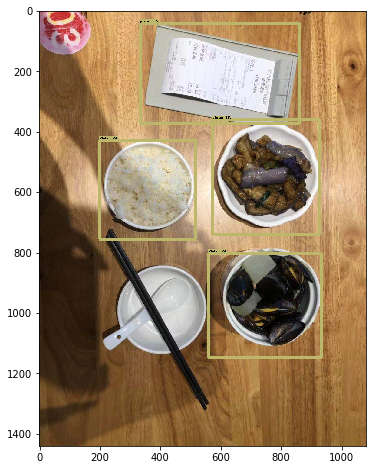

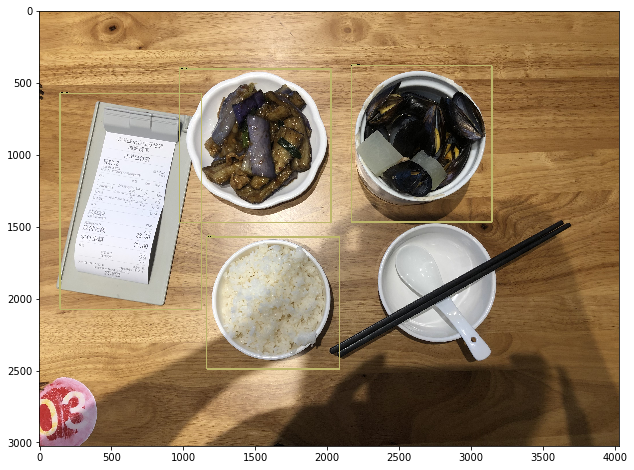

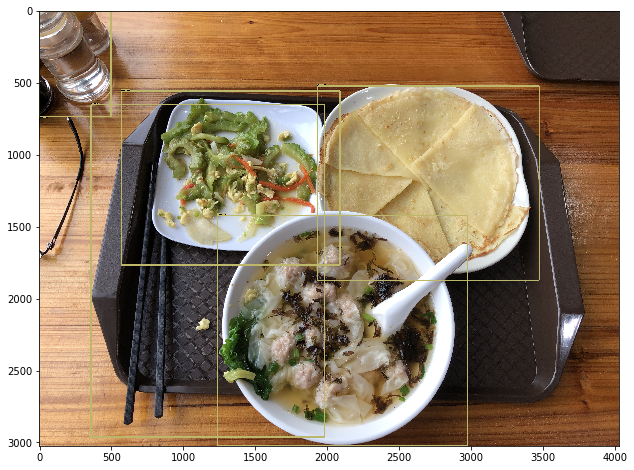

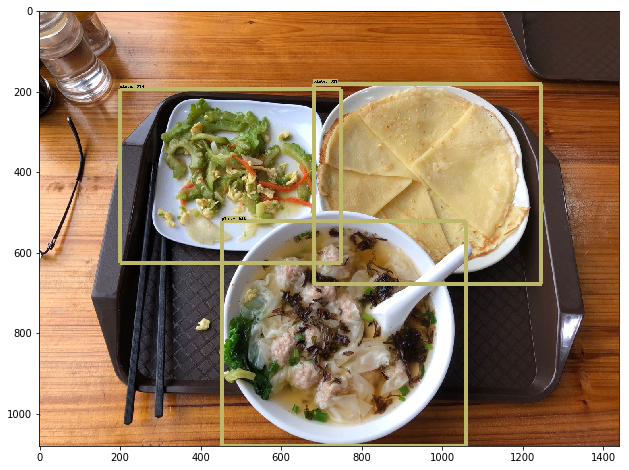

In [0]:
# Visualization of the results of a detection.
for image_path, output_dict in tqdm.tqdm(output_cache.items()):
  image_np = imgnp_cache[image_path]
  
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      min_score_thresh=.95,
      line_thickness=10)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)